In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 

In [2]:
with open("A:\\Machine Learning Projects\\Project 5\\P74-Project-5\\Project 5\\traffic-signs-data\\test.p",mode='rb') as testing_data:
    test = pickle.load(testing_data)
with open("A:\\Machine Learning Projects\\Project 5\\P74-Project-5\\Project 5\\traffic-signs-data\\train.p",mode='rb') as training_data:
    train = pickle.load(training_data)
with open("A:\\Machine Learning Projects\\Project 5\\P74-Project-5\\Project 5\\traffic-signs-data\\valid.p",mode='rb') as validation_data:
    valid = pickle.load(validation_data)

In [3]:
X_train,y_train = train['features'],train['labels']
X_validation,y_validation = valid['features'],valid['labels']
X_test,y_test = test['features'],test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

36

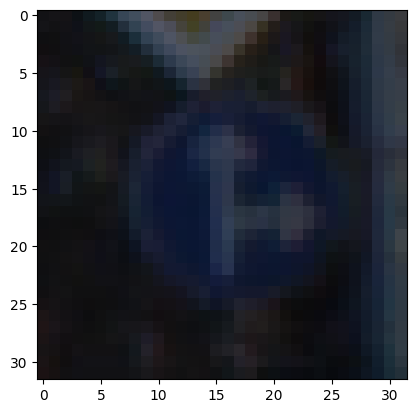

In [10]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

4

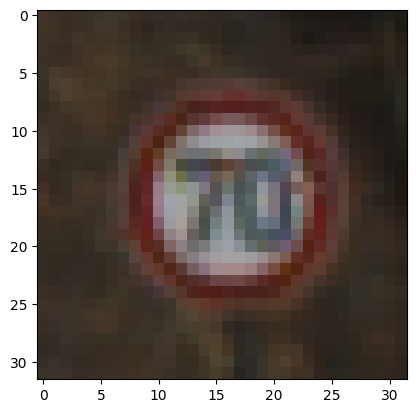

In [11]:
i = 1000
plt.imshow(X_validation[i])
y_validation[i]

In [12]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [13]:
X_train_gray = np.sum(X_train/3,axis = 3,keepdims = True)
X_validation_gray = np.sum(X_validation/3,axis = 3,keepdims = True)
X_test_gray = np.sum(X_test/3,axis = 3,keepdims = True)

In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

In [15]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [16]:
X_test_gray.shape

(12630, 32, 32, 1)

In [17]:
X_train_gray_norm = (X_train_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

In [18]:
X_train_gray_norm


array([[[[ 0.96614583],
         [ 0.98697917],
         [ 0.9921875 ],
         ...,
         [ 0.07291667],
         [ 0.64583333],
         [ 0.9609375 ]],

        [[ 0.4375    ],
         [ 0.76822917],
         [ 0.95833333],
         ...,
         [-0.19010417],
         [ 0.22135417],
         [ 0.3515625 ]],

        [[-0.08333333],
         [ 0.234375  ],
         [ 0.5       ],
         ...,
         [-0.13802083],
         [-0.06510417],
         [-0.14583333]],

        ...,

        [[ 0.        ],
         [ 0.7109375 ],
         [ 0.90364583],
         ...,
         [-0.44010417],
         [-0.1953125 ],
         [-0.21875   ]],

        [[-0.38020833],
         [ 0.05208333],
         [-0.0546875 ],
         ...,
         [-0.45833333],
         [-0.30208333],
         [-0.34895833]],

        [[-0.4296875 ],
         [-0.515625  ],
         [-0.6640625 ],
         ...,
         [-0.5234375 ],
         [-0.61458333],
         [-0.640625  ]]],


       [[[-0.4765625 ],


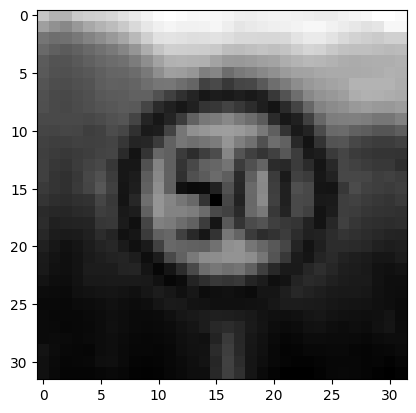

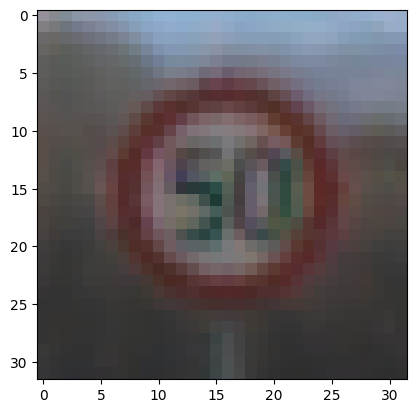

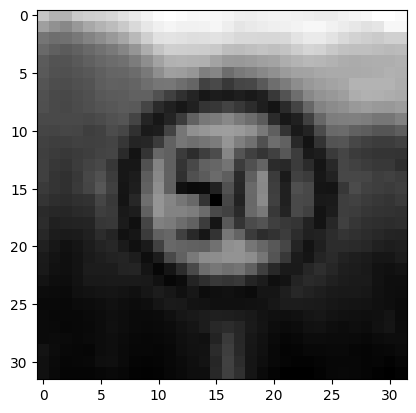

In [19]:
i = 610
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(),cmap = 'gray')

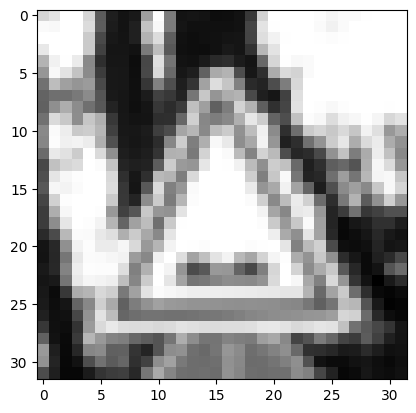

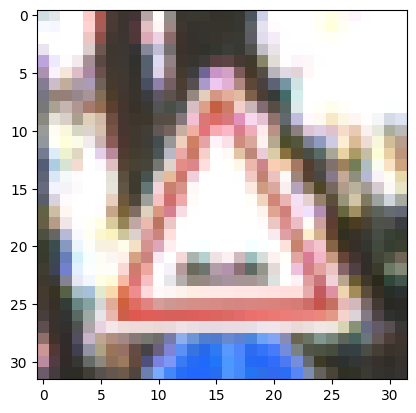

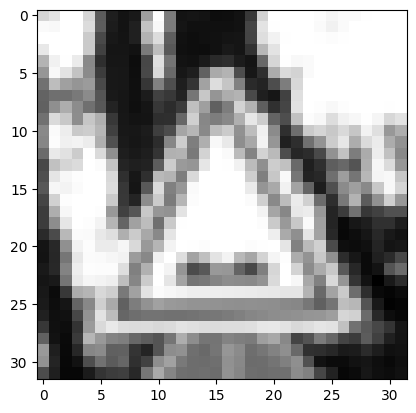

In [20]:
i = 610
plt.imshow(X_validation_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(),cmap = 'gray')

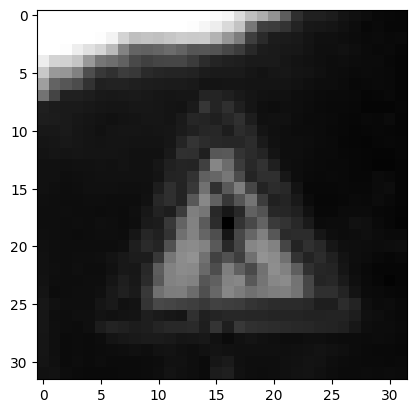

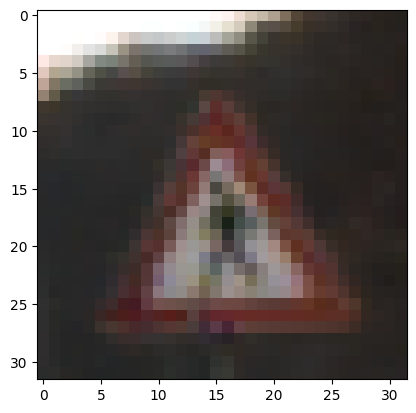

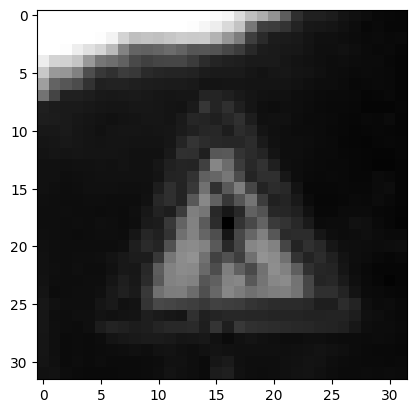

In [21]:
i = 610
plt.imshow(X_test_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(),cmap = 'gray')

## Model 

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [23]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6, kernel_size = (5,5),activation='relu',input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add (Conv2D(filters = 16, kernel_size = (5,5),activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120,activation='relu'))

cnn_model.add(Dense(units= 84,activation='relu'))

cnn_model.add(Dense(units= 43,activation='softmax'))


In [24]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy',optimizer = Adam(learning_rate = 0.01),metrics=['accuracy'])

In [25]:
History = cnn_model.fit(X_train_gray_norm,
              y_train,
              batch_size = 500,
              epochs =  100,
              verbose = 1,
              validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/100
70/70 [==============================] - 5s 61ms/step - loss: 1.8304 - accuracy: 0.4979 - val_loss: 0.7547 - val_accuracy: 0.7844
Epoch 2/100
70/70 [==============================] - 4s 55ms/step - loss: 0.3986 - accuracy: 0.8841 - val_loss: 0.4371 - val_accuracy: 0.8741
Epoch 3/100
70/70 [==============================] - 4s 62ms/step - loss: 0.1922 - accuracy: 0.9453 - val_loss: 0.4000 - val_accuracy: 0.8873
Epoch 4/100
70/70 [==============================] - 5s 70ms/step - loss: 0.1319 - accuracy: 0.9631 - val_loss: 0.3785 - val_accuracy: 0.9025
Epoch 5/100
70/70 [==============================] - 5s 68ms/step - loss: 0.0865 - accuracy: 0.9760 - val_loss: 0.3402 - val_accuracy: 0.9032
Epoch 6/100
70/70 [==============================] - 4s 61ms/step - loss: 0.0773 - accuracy: 0.9778 - val_loss: 0.3978 - val_accuracy: 0.9000
Epoch 7/100
70/70 [==============================] - 4s 62ms/step - loss: 0.0599 - accuracy: 0.9837 - val_loss: 0.3546 - val_accuracy: 0.9152
Epoch 

## Model Evaluation

In [26]:
score = cnn_model.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy:{}'.format(score[1])) 

395/395 [==============================] - 1s 3ms/step - loss: 2.4249 - accuracy: 0.9207
Test Accuracy:0.9207442402839661


In [27]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
accuracy = History.history['accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']
val_accuracy = History.history['val_accuracy']

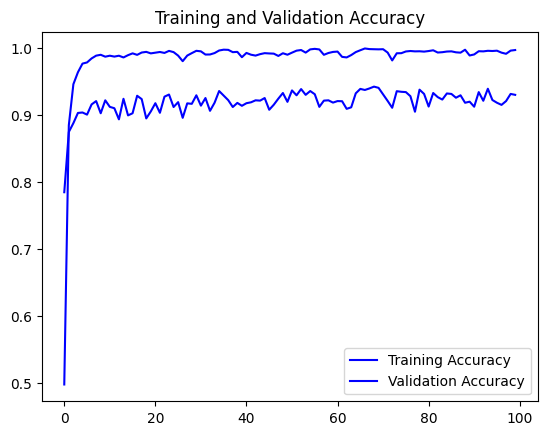

In [29]:
epochs = range(len(accuracy))

plt.plot(epochs,accuracy,'b',label = 'Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

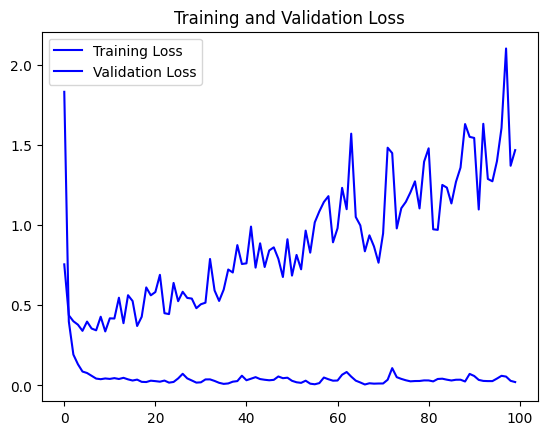

In [30]:
plt.plot(epochs,loss,'b',label = 'Training Loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [31]:
predicted_probabilities = cnn_model.predict(X_test_gray_norm)

# To get the predicted classes, you can use argmax to get the class index with the highest probability
predicted_classes = predicted_probabilities.argmax(axis=1)
# np.argmax(predicted_classes,axis=1).
y_true = y_test


395/395 [==============================] - 1s 2ms/step


<Axes: >

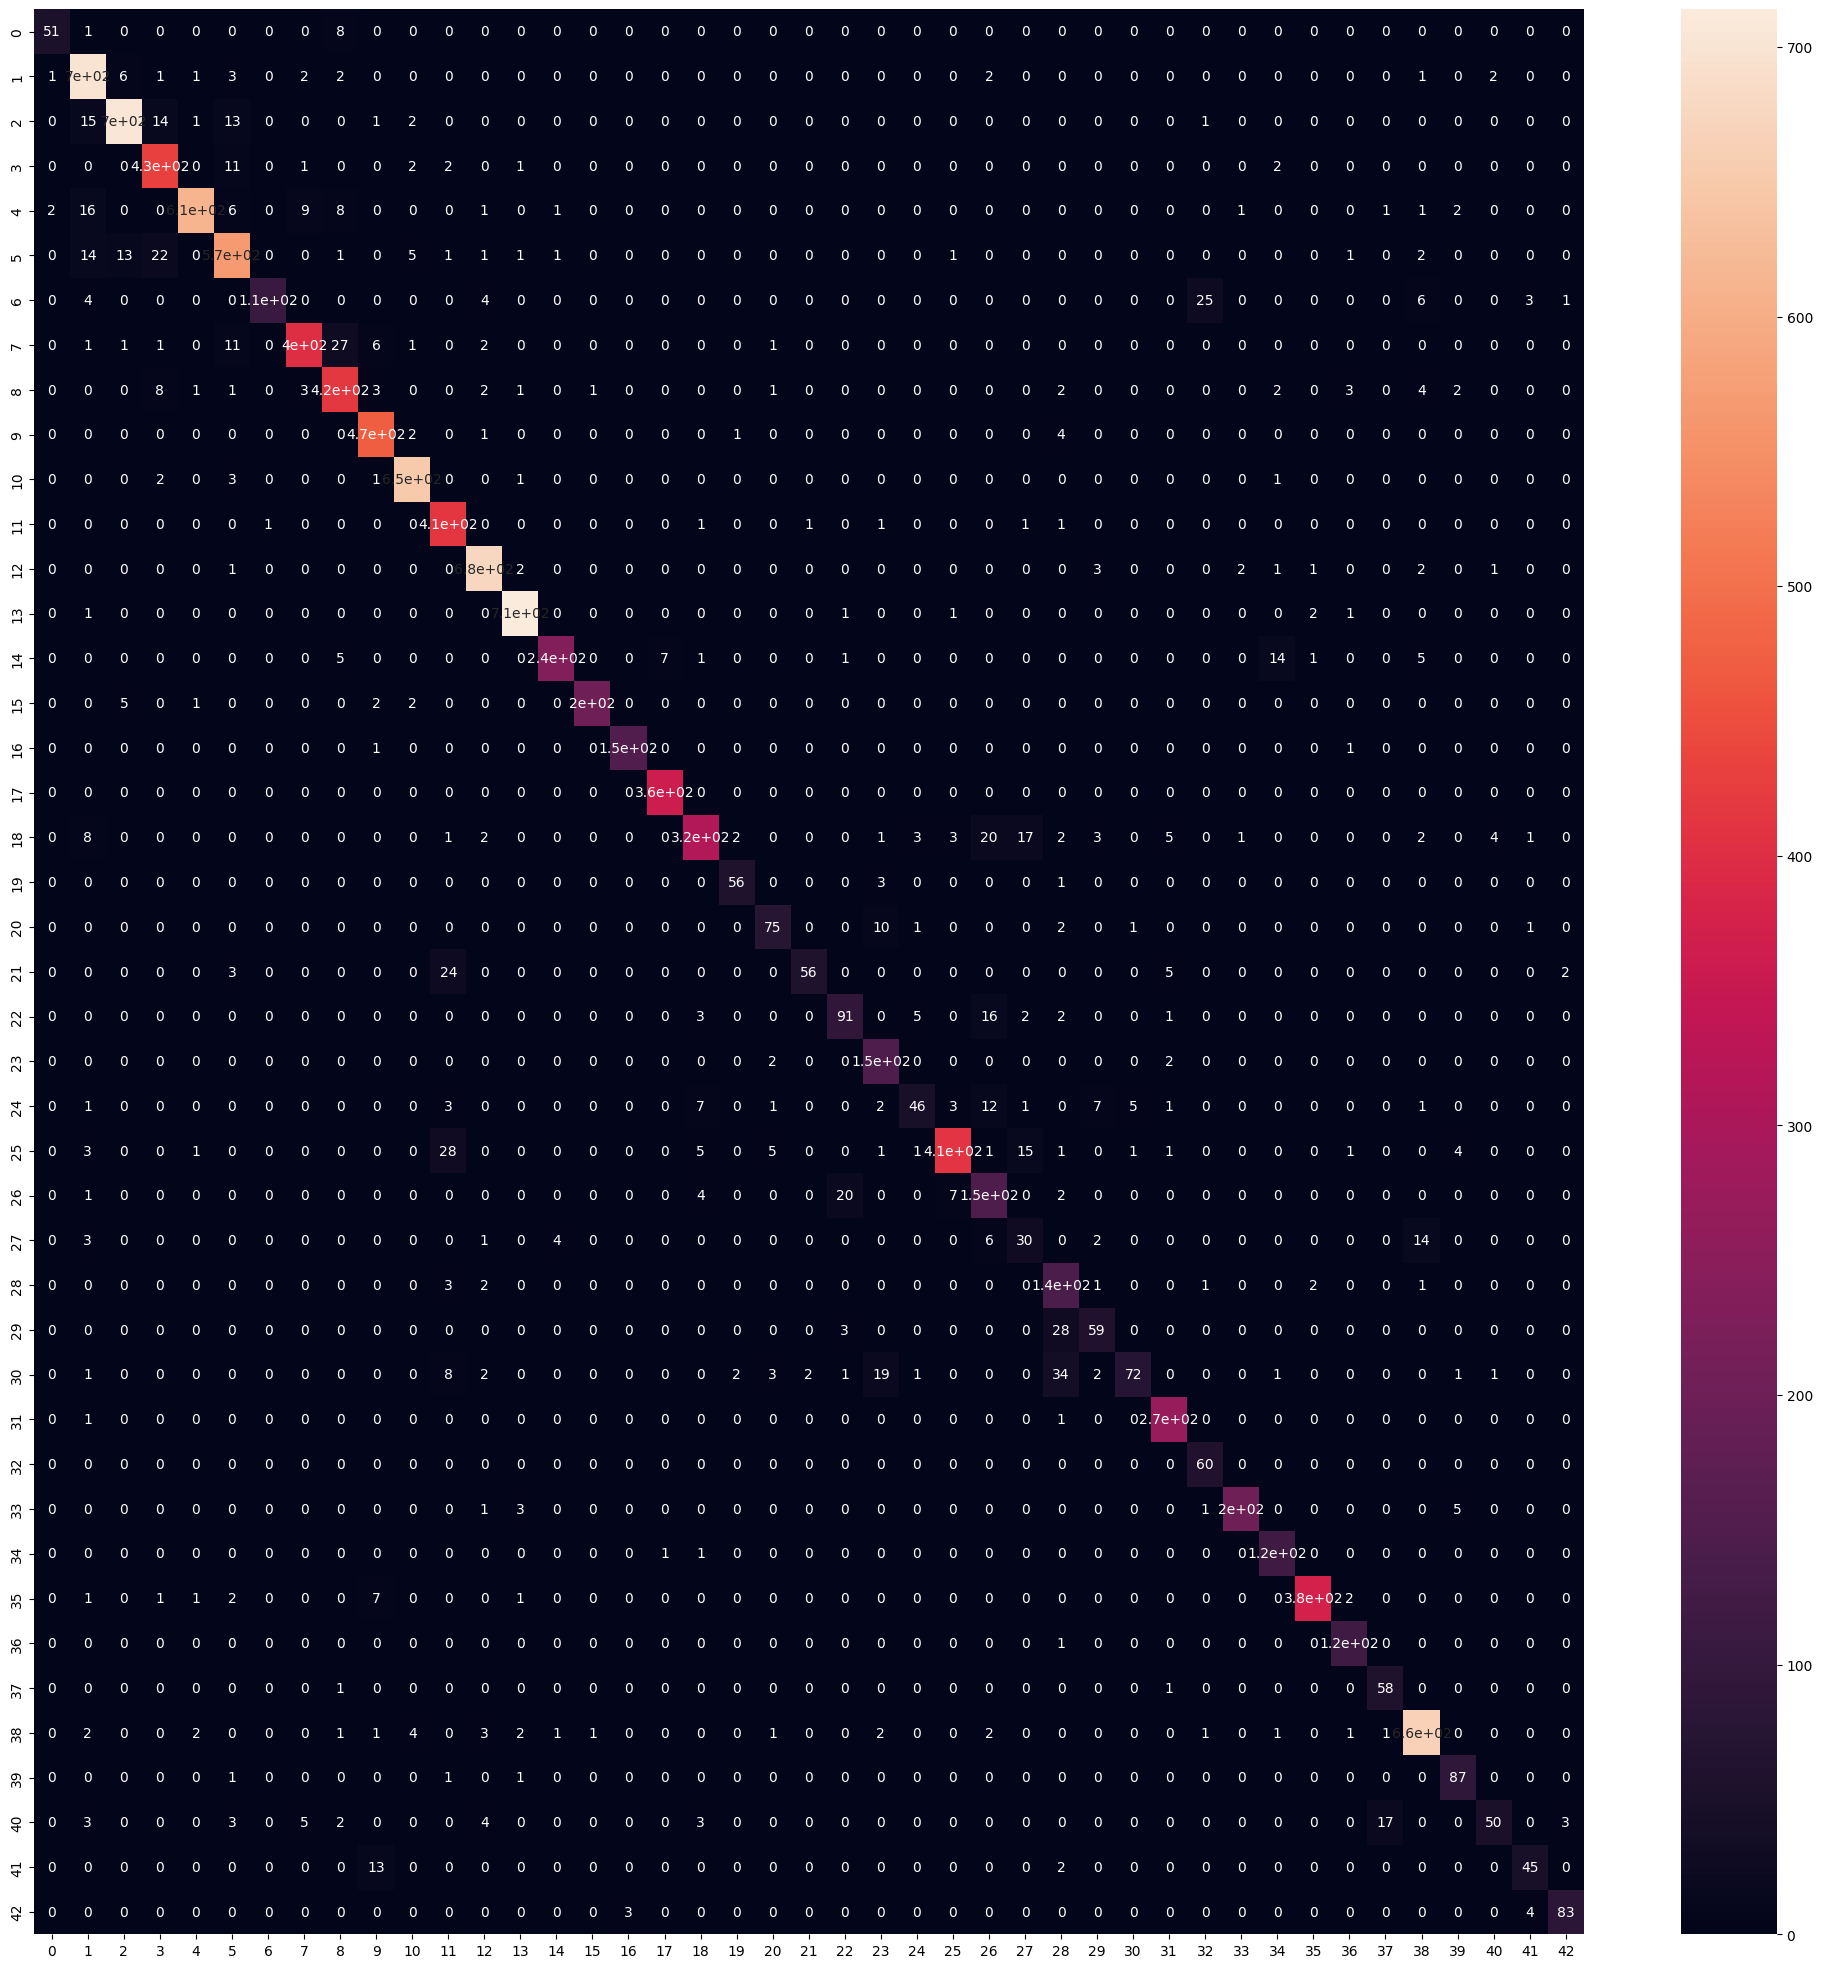

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

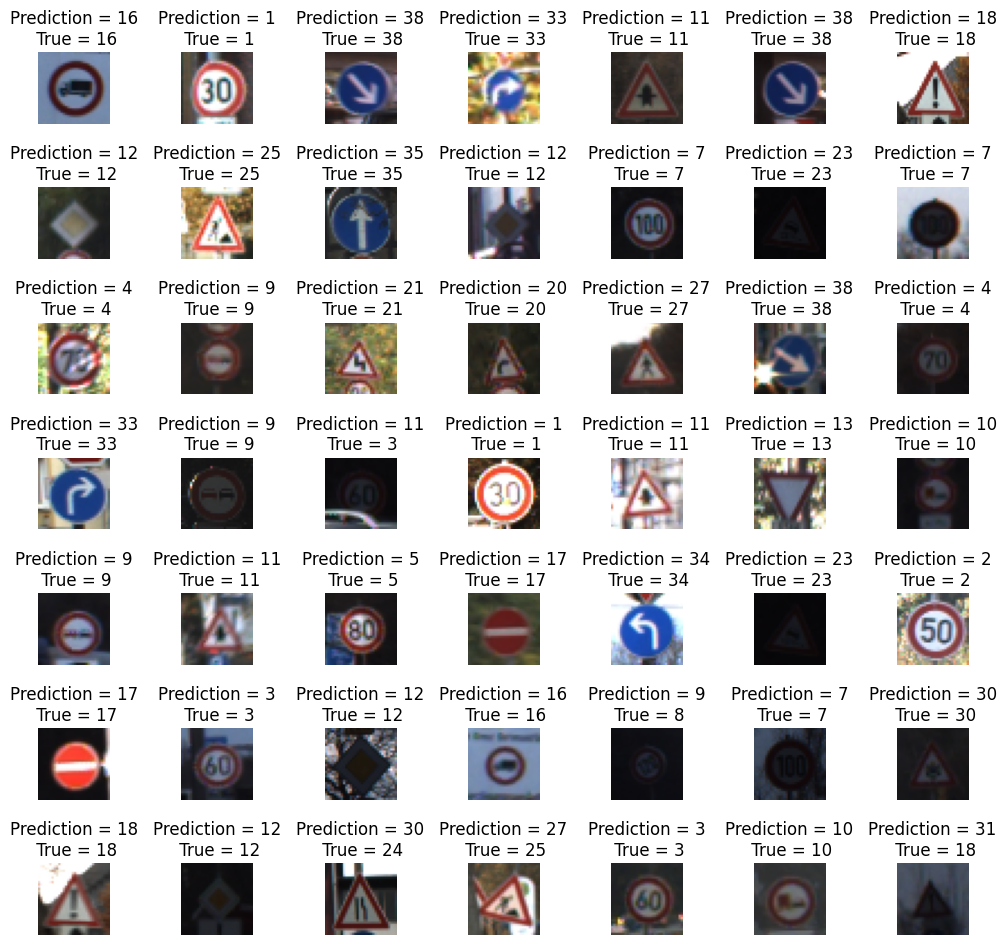

In [33]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],y_true[i])) 
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)